<a href="https://colab.research.google.com/github/nishant42491/Football_Analysis/blob/main/Model_penalty_shootout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
df_shootout=pd.read_csv("/content/shootouts.csv")

In [ ]:
df_shootout

date     home_team         away_team        winner
0    1967-08-22         India            Taiwan        Taiwan
1    1971-11-14   South Korea  Vietnam Republic   South Korea
2    1972-05-17      Thailand       South Korea   South Korea
3    1972-05-19      Thailand          Cambodia      Thailand
4    1973-07-26      Malaysia            Kuwait      Malaysia
..          ...           ...               ...           ...
427  2021-07-06     Guatemala        Guadeloupe    Guadeloupe
428  2021-07-11       England             Italy         Italy
429  2021-07-16       Senegal          Eswatini       Senegal
430  2021-07-18      Eswatini        Mozambique      Eswatini
431  2021-07-18  South Africa           Senegal  South Africa

[432 rows x 4 columns]

In [ ]:
df1=df_shootout.home_team.value_counts()

In [ ]:
df2=df_shootout.away_team.value_counts()

In [ ]:
df3=df1.add(df2,fill_value=0)

In [ ]:
df3.index

Index(['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Vietnam Republic', 'Yugoslavia', 'Zambia', 'Zanzibar', 'Zimbabwe'],
      dtype='object', length=154)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)

In [ ]:
onehot = encoder.fit_transform(np.array(list(df3.index)).reshape(-1,1))
print(onehot)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
onehot.shape

(154, 154)

In [ ]:
print(np.array(df3.index).reshape(-1,1))

[['Algeria']
 ['Angola']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Australia']
 ['Austria']
 ['Bahrain']
 ['Bangladesh']
 ['Barbados']
 ['Belarus']
 ['Belgium']
 ['Benin']
 ['Bolivia']
 ['Botswana']
 ['Brazil']
 ['British Virgin Islands']
 ['Bulgaria']
 ['Burkina Faso']
 ['Burundi']
 ['Cambodia']
 ['Cameroon']
 ['Canada']
 ['Central African Republic']
 ['Chad']
 ['Chile']
 ['China PR']
 ['Colombia']
 ['Congo']
 ['Costa Rica']
 ['Croatia']
 ['Cuba']
 ['Cyprus']
 ['Czech Republic']
 ['Czechoslovakia']
 ['DR Congo']
 ['Denmark']
 ['Ecuador']
 ['Egypt']
 ['El Salvador']
 ['England']
 ['Equatorial Guinea']
 ['Estonia']
 ['Eswatini']
 ['Ethiopia']
 ['Fiji']
 ['Finland']
 ['France']
 ['French Guiana']
 ['Gabon']
 ['Gambia']
 ['Georgia']
 ['Germany']
 ['Ghana']
 ['Greece']
 ['Guadeloupe']
 ['Guatemala']
 ['Guinea']
 ['Guinea-Bissau']
 ['Guyana']
 ['Haiti']
 ['Honduras']
 ['Hong Kong']
 ['Hungary']
 ['India']
 ['Indonesia']
 ['Iran']
 ['Iraq']
 ['Israel']
 ['Italy']
 ['Ivory Coast

In [ ]:
ohv={}

In [ ]:
for i in range(len(df3.index)):
  ohv[df3.index[i]]=onehot[i,:]

In [ ]:
ohv

{'Algeria': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 'Angola': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
dfa=pd.DataFrame(columns=["teams","result"])

In [ ]:
for i,r in df_shootout.iterrows():
  nh=ohv[r["home_team"]]+ohv[r["away_team"]]
  res=ohv[r["winner"]]
  dfa.loc[-1]=[nh,res]
  dfa.index = dfa.index + 1  # shifting index
  dfa = dfa.sort_index() 


In [ ]:
dfa

teams                                             result
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
..                                                 ...                                                ...
427  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
428  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
429  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
430  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
431  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[432 rows x 2 columns]

In [ ]:
X=dfa.teams.values
Y=dfa.result.values

In [ ]:
Y[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.1, train_size=0.9, random_state=42, shuffle=True,)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
from torch.utils.tensorboard import SummaryWriter

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class CustomDataset(Dataset):
 def __init__(self, x, y):
  self.x = x
  self.y = y

 def __getitem__(self, index):
   xi=self.x[index]
   xi=torch.from_numpy(xi)
   yi=torch.from_numpy(self.y[index])

   return (xi, yi)

 def __len__(self):



   return len(self.x)

 
x_train_tensor = X
y_train_tensor = Y

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
x_train_tensor = X_train
y_train_tensor = Y_train
train_data = CustomDataset(x_train_tensor, y_train_tensor)

In [ ]:
train_loader = DataLoader(
dataset=train_data,
batch_size=16,
shuffle=True,
)

In [ ]:
model=nn.Sequential(
                    nn.Linear(154,100),
                    nn.ReLU(),
                    nn.Linear(100,50),
                    nn.ReLU(),
                    nn.Linear(50,100),
                    nn.ReLU(),
                    nn.Linear(100,154),
                    nn.Sigmoid()
                    )
loss_fn=nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model=model.to(device)
n_epochs = 1000
losses = []
for epoch in range(n_epochs):
  mini_batch_losses = []
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)
    model.train()
    yhat = model(x_batch.float())
    
    
    mb_loss = loss_fn(yhat,y_batch.float())
    mini_batch_losses.append(mb_loss.item())

    mb_loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
  loss = np.mean(mini_batch_losses)
  losses.append(loss)
  if epoch%5==0:
    print("epoch is {} ".format(epoch))
    print("losses is {}\n\n\n".format(losses[-1]))

epoch is 0 
losses is 0.22312505125999452



epoch is 5 
losses is 0.006460681390017271



epoch is 10 
losses is 0.006427676174789667



epoch is 15 
losses is 0.006414103228598833



epoch is 20 
losses is 0.006376809161156416



epoch is 25 
losses is 0.0062922826409339905



epoch is 30 
losses is 0.006208848468959332



epoch is 35 
losses is 0.006240596957504749



epoch is 40 
losses is 0.006208572015166283



epoch is 45 
losses is 0.006118575632572174



epoch is 50 
losses is 0.005886857416480779



epoch is 55 
losses is 0.005728547926992178



epoch is 60 
losses is 0.005466972514986992



epoch is 65 
losses is 0.005155044496059418



epoch is 70 
losses is 0.004953584102913737



epoch is 75 
losses is 0.0045999854058027265



epoch is 80 
losses is 0.0043197611626237635



epoch is 85 
losses is 0.0039513348508626225



epoch is 90 
losses is 0.003801140086725354



epoch is 95 
losses is 0.003527658423408866



epoch is 100 
losses is 0.003370409575290978



epoch is 10

In [ ]:
y1=model(train_data[0][0].float())

In [ ]:
train_data[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [ ]:
y1

tensor([0.0000e+00, 0.0000e+00, 1.9459e-18, 5.9896e-15, 6.0911e-29, 0.0000e+00,
        1.1244e-28, 3.8715e-37, 9.2274e-28, 2.2765e-27, 1.4894e-26, 0.0000e+00,
        3.4403e-26, 6.2493e-28, 1.4922e-28, 2.4063e-17, 1.3532e-36, 1.4914e-28,
        5.3276e-27, 3.1296e-28, 5.0725e-29, 3.0520e-18, 5.2006e-28, 1.2645e-28,
        0.0000e+00, 2.7869e-17, 0.0000e+00, 2.8360e-03, 1.9536e-28, 6.8997e-19,
        1.8092e-30, 2.2656e-27, 2.1161e-27, 2.6134e-27, 1.1203e-16, 3.3757e-17,
        7.7596e-28, 5.3205e-28, 0.0000e+00, 2.0682e-29, 9.9895e-01, 1.5934e-27,
        2.8756e-28, 0.0000e+00, 0.0000e+00, 7.8962e-27, 6.4965e-29, 1.9162e-15,
        1.2237e-28, 0.0000e+00, 2.7988e-27, 1.1096e-28, 1.3940e-15, 8.5462e-35,
        1.1912e-28, 2.4279e-27, 7.1641e-27, 3.2824e-17, 2.7038e-28, 4.1038e-28,
        9.7852e-28, 3.5379e-20, 0.0000e+00, 3.2545e-33, 1.6135e-27, 2.6672e-29,
        0.0000e+00, 9.1938e-29, 2.5079e-27, 2.1822e-03, 0.0000e+00, 1.2446e-27,
        0.0000e+00, 3.2999e-29, 1.8432e-

In [ ]:
model.eval()

Sequential(
  (0): Linear(in_features=154, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=154, bias=True)
  (7): Sigmoid()
)

For England vs Columbia

In [ ]:
ov=ohv['Argentina']+ohv['Netherlands']

In [ ]:
y=model(torch.from_numpy(ov).float())

In [ ]:
z=y.detach().numpy()

In [ ]:
i=np.argmax(z)

In [ ]:
i

3

In [ ]:
a=np.zeros_like(z)
a[i]=1

In [ ]:
for key,values in ohv.items():
  if np.array_equal(values,a):
    print(key)

Argentina


Argentina won

In [ ]:
def pred(team1,team2):
  ov=ohv[team1]+ohv[team2]
  y=model(torch.from_numpy(ov).float())
  z=y.detach().numpy()
  i1=np.argmax(ohv[team1])
  i2=np.argmax(ohv[team2])
  if abs(1-z[i1])<abs(1-z[i2]):
    i=i1
  else:
    i=i2  

  
  a=np.zeros_like(z)
  a[i]=1
  for key,values in ohv.items():
    if np.array_equal(values,a):
      print(key)


In [ ]:
pred("India","France")

France


In [ ]:
torch.save(model.state_dict(),"wieghts")

In [ ]:

model.load_state_dict(torch.load("wieghts"))
model.eval()

Sequential(
  (0): Linear(in_features=154, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=154, bias=True)
  (7): Sigmoid()
)

In [ ]:
acc=0
for p in range(len(X_val)):
  y=model(torch.from_numpy(X_val[p]).float())
  z=y.detach().numpy()
  abcd=np.where(X_val[p]==1)
  i1=abcd[0][0]
  i2=abcd[0][1]
  if abs(1-z[i1])<abs(1-z[i2]):
    i=i1
  else:
    i=i2  

  
  a=np.zeros_like(z)
  a[i]=1

  if np.array_equal(Y_val[p],a):
    acc+=1

  
  


In [ ]:
print(acc)

19


In [ ]:
print(len(X_val))

44


In [ ]:
print(acc*100/44)

43.18181818181818


# **FIFA WORLD CUP 2018**

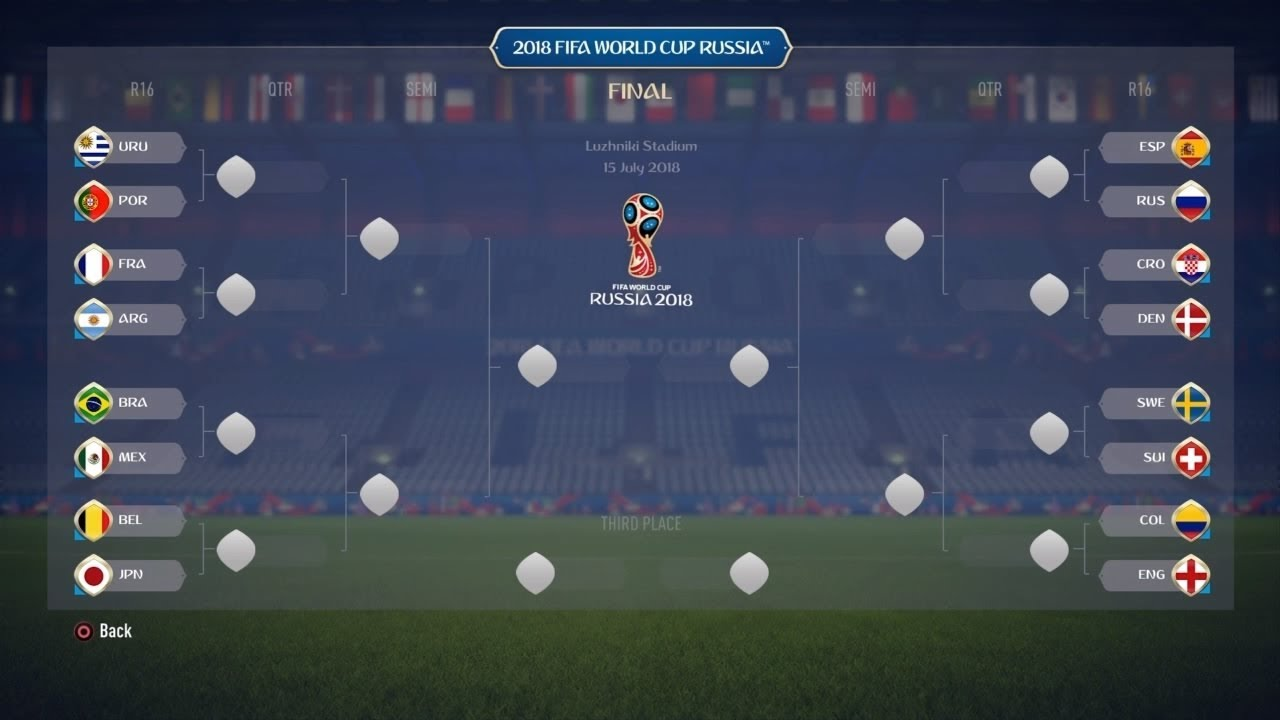

In [ ]:
pred("Uruguay","Portugal")

Uruguay


In [ ]:
pred("France","Argentina")

France


In [ ]:
pred("Brazil","Mexico")

Brazil


In [ ]:
pred("Belgium","Japan")

Belgium


In [ ]:
pred("Spain","Russia")

Russia


In [ ]:
pred("Croatia","Denmark")

Croatia


In [ ]:
pred("Sweden","Switzerland")

Switzerland


In [ ]:
pred("Colombia","England")

England


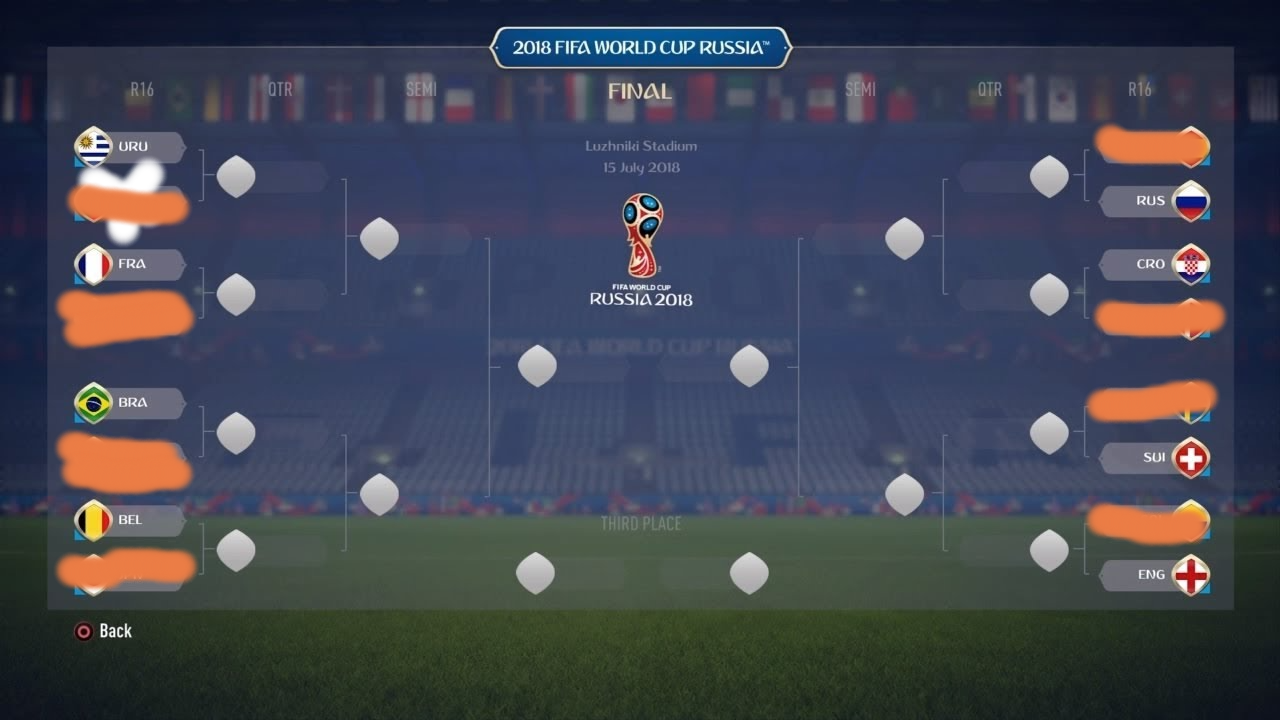

In [ ]:
pred("Uruguay","France")

Uruguay


In [ ]:
pred("Brazil","Belgium")

Belgium


In [ ]:
pred("Russia","Croatia")

Croatia


In [ ]:
pred("Switzerland","England")

England


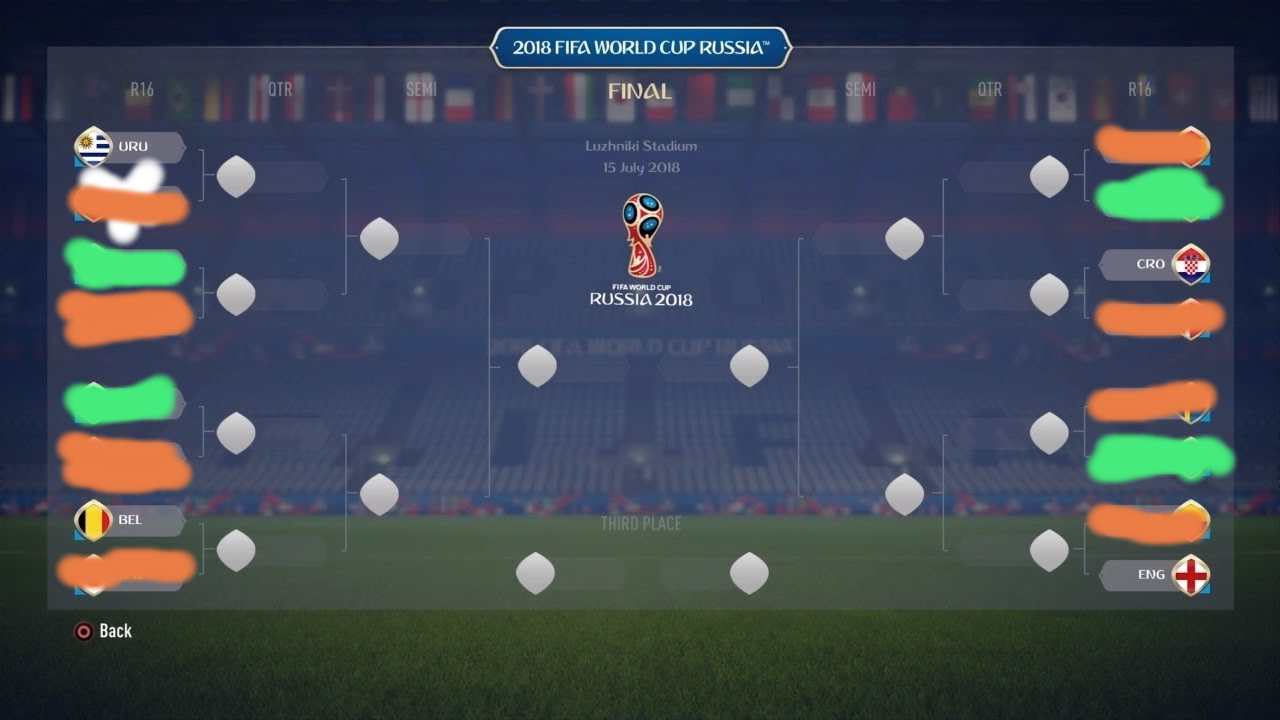

In [ ]:
pred("Uruguay","Belgium")

Uruguay


In [ ]:
pred("Croatia","England")

Croatia


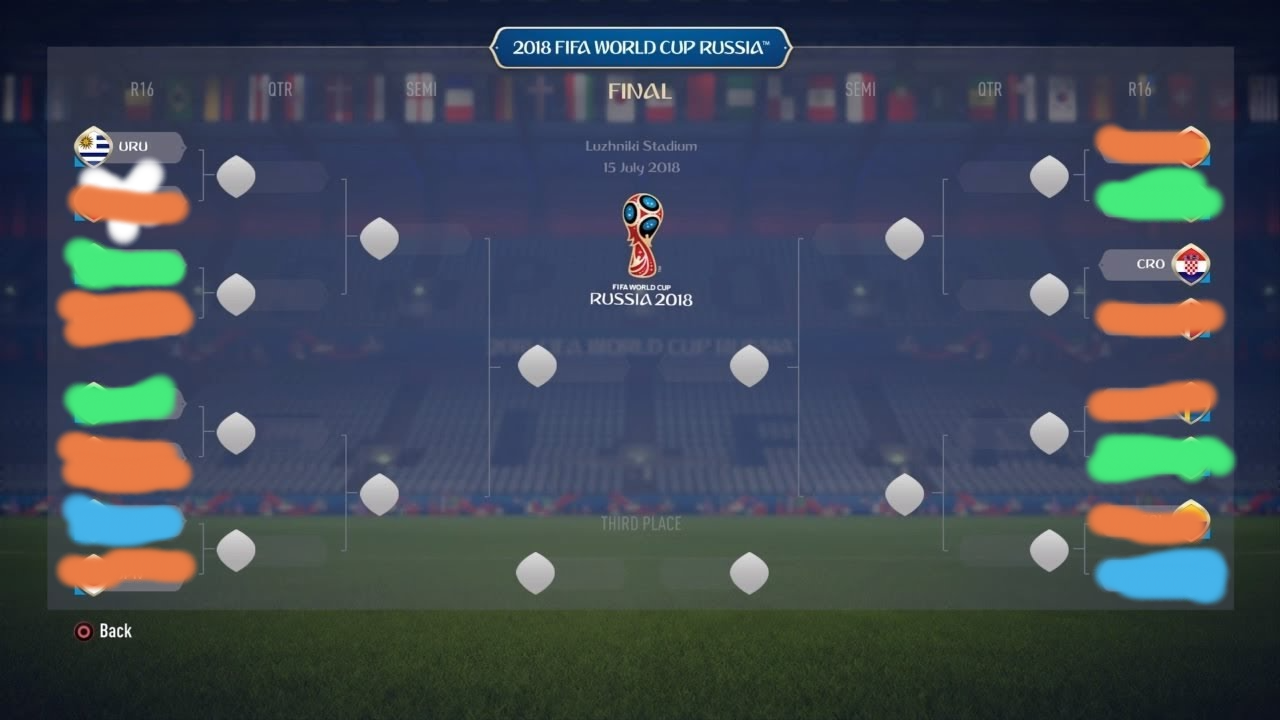

In [ ]:
pred("Uruguay","Croatia")

Croatia


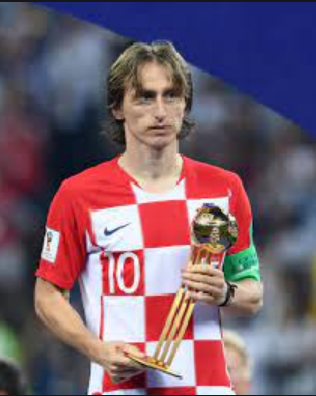